<a href="https://colab.research.google.com/gist/parulnith/7f8c174e6ac099e86f0495d3d9a4c01e/untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre classification notebook

## Importing Libraries

In [6]:
# notebook basis taken from Parul Pandey
# https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8
# modified to work with stream processing and do frame-wise classification

# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
/home/x75/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/x75/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/x75/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/x75/.local/lib/python3.6/site-packages/tensorflow/python/framework/d

## Extracting music and features

### Dataset

We use [GTZAN genre collection](http://marsyasweb.appspot.com/download/data_sets/) dataset for classification. 
<br>
<br>
The dataset consists of 10 genres i.e
 * Blues
 * Classical
 * Country
 * Disco
 * Hiphop
 * Jazz
 * Metal
 * Pop
 * Reggae
 * Rock
 
Each genre contains 100 songs. Total dataset: 1000 songs

## Extracting the Spectrogram for every Audio

block 646 blocklen (290,), D_block (513, 1), D (646, 513)


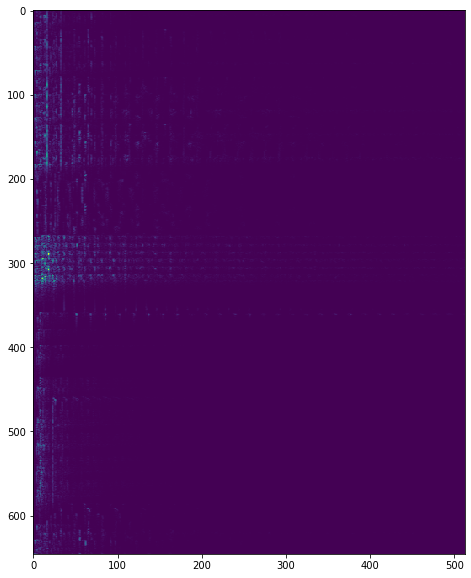

genre       jazz, filename        jazz.00001.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00001.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


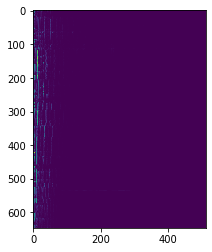

genre       jazz, filename        jazz.00009.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00009.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


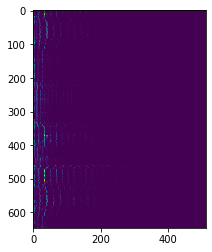

genre       jazz, filename        jazz.00004.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00004.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


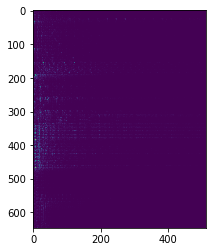

genre       jazz, filename        jazz.00000.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00000.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


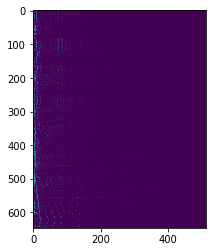

genre       jazz, filename        jazz.00008.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00008.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


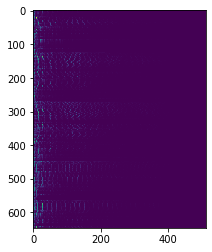

genre       jazz, filename        jazz.00006.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00006.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


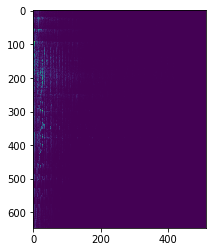

genre       jazz, filename        jazz.00003.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00003.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


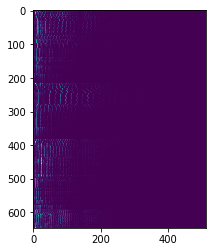

genre       jazz, filename        jazz.00002.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00002.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


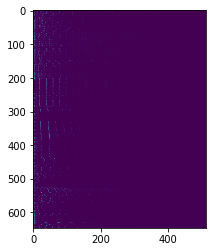

genre       jazz, filename        jazz.00005.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00005.au
block 646 blocklen (290,), D_block (513, 1), D (646, 513)


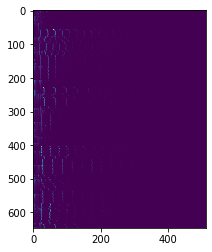

genre       jazz, filename        jazz.00007.au, sr 22050 songname ../data/mini-genres/jazz/jazz.00007.au


In [41]:
cmap = plt.get_cmap('inferno')
fileroot = '../data/mini-genres'
#fileroot = './MIR/genres'

plt.figure(figsize=(10,10))
# genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
genres = 'classical jazz metal pop rock'.split()
framesize = 1024
for g in ['jazz']: # genres:
    # pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'{fileroot}/{g}'):
        songname = f'{fileroot}/{g}/{filename}'
        sr = librosa.get_samplerate(songname)
        stream = librosa.stream(songname,
                            block_length=1,
                            frame_length=framesize,
                            hop_length=framesize,
                            mono=True)
        # framecnt = 0
        D = []
        for block_i, block_y in enumerate(stream):
            block_y_len = block_y.shape
            # print(f'block {block_i} blocklen {block_y_len}')
            if len(block_y) < framesize: continue
            D_block = librosa.stft(block_y, n_fft=framesize, hop_length=framesize, center=False)
            D.append(D_block[:,0])
            
        D = np.array(D) #.reshape((-1, framesize/2 + 1))
        print(f'block {block_i} blocklen {block_y_len}, D_block {D_block.shape}, D {D.shape}')
        # y, sr = librosa.load(songname, mono=True, duration=5)
        # plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        # plt.axis('off');
        # plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        # plt.clf()
        # plt.imshow(np.sqrt(np.sum(np.square(D))))
        plt.imshow(np.abs(D))
        plt.show()
        print(f'genre {g:>10}, filename {filename:>20}, sr {sr} songname {songname}')
 

All the audio files get converted into their respective spectrograms .WE can noe easily extract features from them.

## Extracting features from Spectrogram


We will extract

* Mel-frequency cepstral coefficients (MFCC)(20 in number)
* Spectral Centroid,
* Zero Crossing Rate
* Chroma Frequencies
* Spectral Roll-off.

In [44]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

## Writing data to csv file

We write the data to a csv file 

In [66]:
file = open('data-stream.csv', 'w', newline='')
fileroot = '../data/mini-genres'
with file:
    writer = csv.writer(file)
    writer.writerow(header)
# genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
genres = 'classical jazz metal pop rock'.split()
# genres = ['jazz']
framesize = 1024
for g in genres:
    print(f'genre {g}')
    for filename in os.listdir(f'{fileroot}/{g}'):
        print(f'    song {filename}')
        songname = f'{fileroot}/{g}/{filename}'
        
        # y, sr = librosa.load(songname, mono=True, duration=30)
        
        sr = librosa.get_samplerate(songname)
        stream = librosa.stream(songname,
                            block_length=1,
                            frame_length=framesize,
                            hop_length=framesize,
                            mono=True)
        
        # D = []
        for block_i, block_y in enumerate(stream):
            block_y_len = block_y.shape
            # print(f'block {block_i} blocklen {block_y_len}')
            if len(block_y) < framesize: continue
            # D_block = librosa.stft(block_y, n_fft=framesize, hop_length=framesize, center=False)
            # D.append(D_block[:,0])
            y = block_y
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_fft=framesize, hop_length=framesize, center=False)
            rmse = librosa.feature.rms(y=y, frame_length=framesize, hop_length=framesize, center=False)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, n_fft=framesize, hop_length=framesize, center=False)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=framesize, hop_length=framesize, center=False)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, n_fft=framesize, hop_length=framesize, center=False)
            zcr = librosa.feature.zero_crossing_rate(y, frame_length=framesize, hop_length=framesize, center=False)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_fft=framesize, hop_length=framesize, center=False)
            
            # D = np.array(D) #.reshape((-1, framesize/2 + 1))

            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            file = open('data-stream.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

genre classical
    song classical.00004.au
    song classical.00002.au
    song classical.00008.au
    song classical.00006.au
    song classical.00001.au
    song classical.00007.au
    song classical.00003.au
    song classical.00009.au
    song classical.00000.au
    song classical.00005.au
genre jazz
    song jazz.00001.au
    song jazz.00009.au
    song jazz.00004.au
    song jazz.00000.au
    song jazz.00008.au
    song jazz.00006.au
    song jazz.00003.au
    song jazz.00002.au
    song jazz.00005.au
    song jazz.00007.au
genre metal
    song metal.00009.au
    song metal.00005.au
    song metal.00006.au
    song metal.00004.au
    song metal.00008.au
    song metal.00001.au
    song metal.00002.au
    song metal.00003.au
    song metal.00007.au
    song metal.00000.au
genre pop
    song pop.00001.au
    song pop.00009.au
    song pop.00006.au
    song pop.00004.au
    song pop.00005.au
    song pop.00002.au
    song pop.00008.au
    song pop.00000.au
    song pop.00003.au
   

The data has been extracted into a [data.csv](https://github.com/parulnith/Music-Genre-Classification-with-Python/blob/master/data.csv) file.

# Analysing the Data in Pandas

In [2]:
data = pd.read_csv('data-stream.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,classical.00004.au,0.341782,0.016502,1610.181408,1838.707715,3122.314453,0.107422,-372.561890,130.186447,-18.234148,...,13.790420,-12.709771,19.086967,-0.005800,6.076229,-37.201881,-1.970177,0.702139,9.621800,classical
1,classical.00004.au,0.295944,0.018407,1410.448956,1644.840168,2497.851562,0.101562,-387.243896,139.557251,-21.278389,...,5.502175,-10.095574,23.976189,2.761300,4.806606,-22.225424,1.894759,2.225845,15.528036,classical
2,classical.00004.au,0.526006,0.014492,1746.097667,2129.205347,3983.642578,0.076172,-375.913208,124.433762,-8.068501,...,8.982050,-24.263309,12.210756,-5.048585,1.793206,-25.612984,8.815256,-2.248587,4.211979,classical
3,classical.00004.au,0.288085,0.019023,1541.878520,1944.207090,3229.980469,0.070312,-368.078552,132.094467,-8.895307,...,9.292525,-21.313766,14.369326,-0.218751,6.651124,-13.826843,4.417452,-8.321957,-0.702668,classical
4,classical.00004.au,0.518966,0.017165,1574.208650,1855.261672,3014.648438,0.092773,-355.009460,137.123138,-18.664280,...,9.671850,-31.856327,3.346087,-15.467061,17.284203,0.313403,13.432608,-4.806921,-10.778502,classical


In [3]:
data.shape

(32300, 28)

In [4]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

## Encoding the Labels

In [7]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [11]:
y.shape

(32300,)

## Scaling the Feature columns

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
from pickle import dump
dump(scaler, open('scaler.pkl', 'wb'))

## Dividing data into training and Testing set

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
len(y_train)

25840

In [75]:
len(y_test)

6460

In [76]:
X_train[10]

array([ 0.66546073,  0.03084114,  0.89138534,  1.03074158,  0.79105377,
        0.56256648,  0.86135054, -1.36260796,  0.4878498 ,  0.46870133,
        1.22836196,  0.08754912,  1.64407612, -0.71172607,  1.51115833,
       -0.6386473 ,  1.29953884, -0.34089494,  0.98241006, -0.28138542,
        0.72249088, -1.04946389,  0.29334294, -0.4372758 ,  0.10463157,
       -0.17389741])

# Classification with Keras

## Building our Network

In [77]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [78]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128)
                   

Epoch 1/50
25840/25840 [==============================] - 0s 16us/step - loss: 0.0224 - acc: 0.9924
Epoch 2/50
25840/25840 [==============================] - 0s 15us/step - loss: 0.0181 - acc: 0.9943
Epoch 3/50
25840/25840 [==============================] - 0s 14us/step - loss: 0.0176 - acc: 0.9942
Epoch 4/50
25840/25840 [==============================] - 0s 13us/step - loss: 0.0212 - acc: 0.9924
Epoch 5/50
25840/25840 [==============================] - 0s 12us/step - loss: 0.0155 - acc: 0.9943
Epoch 6/50
25840/25840 [==============================] - 0s 12us/step - loss: 0.0180 - acc: 0.9935
Epoch 7/50
25840/25840 [==============================] - 0s 12us/step - loss: 0.0182 - acc: 0.9938
Epoch 8/50
25840/25840 [==============================] - 0s 12us/step - loss: 0.0170 - acc: 0.9938
Epoch 9/50
25840/25840 [==============================] - 0s 13us/step - loss: 0.0107 - acc: 0.9962
Epoch 10/50
25840/25840 [==============================] - 0s 12us/step - loss: 0.0121 - acc: 0.9959

In [83]:
test_loss, test_acc = model.evaluate(X_test,y_test)

6460/6460 [==============================] - 0s 13us/step


In [84]:
print('test_acc: ',test_acc)

test_acc:  0.9730650154429693


In [85]:
def model_serialize(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

Tes accuracy is less than training dataa accuracy. This hints at Overfitting

In [86]:
model_serialize(model)

Saved model to disk


In [95]:
dump(scaler, open('scaler.pkl', 'wb'))

In [97]:
genre_list.unique()

array(['classical', 'jazz', 'metal', 'pop', 'rock'], dtype=object)

## Validating our approach
Let's set apart 200 samples in our training data to use as a validation set:

In [56]:
validx = int(data.shape[0] * 0.2)
x_val = X_train[:validx]
partial_x_train = X_train[validx:]

y_val = y_train[:validx]
partial_y_train = y_train[validx:]

Now let's train our network for 20 epochs:

In [57]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 30 samples, validate on 10 samples
Epoch 1/30
30/30 [==============================] - 1s 23ms/step - loss: 2.3581 - acc: 0.0000e+00 - val_loss: 2.1848 - val_acc: 0.5000
Epoch 2/30
30/30 [==============================] - 0s 292us/step - loss: 2.1120 - acc: 0.6333 - val_loss: 2.0159 - val_acc: 0.8000
Epoch 3/30
30/30 [==============================] - 0s 250us/step - loss: 1.9547 - acc: 0.9333 - val_loss: 1.8189 - val_acc: 1.0000
Epoch 4/30
30/30 [==============================] - 0s 165us/step - loss: 1.7711 - acc: 0.9667 - val_loss: 1.6125 - val_acc: 1.0000
Epoch 5/30
30/30 [==============================] - 0s 149us/step - loss: 1.5674 - acc: 0.9667 - val_loss: 1.4005 - val_acc: 0.9000
Epoch 6/30
30/30 [==============================] - 0s 209us/step - loss: 1.3514 - acc: 0.9667 - val_loss: 1.1858 - val_acc: 0.9000
Epoch 7/30
30/30 [==============================] - 0s 280us/step - loss: 1.1316 - acc: 0.9667 - val_loss: 0.9819 - val_acc: 0.9000
Epoch 8/30
30/30 [===========

In [58]:
results

[1.6414333581924438, 0.6000000238418579]

## Predictions on Test Data

In [59]:
predictions = model.predict(X_test)

In [60]:
predictions[0].shape

(10,)

In [61]:
np.sum(predictions[0])

0.9999999

In [62]:
np.argmax(predictions[0])

0

In [63]:
print(predictions.shape)
X_test.shape

(10, 10)


(10, 26)

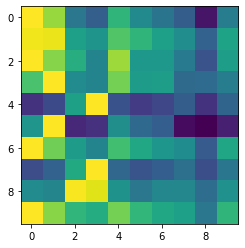

In [67]:
plt.imshow(np.log(predictions))

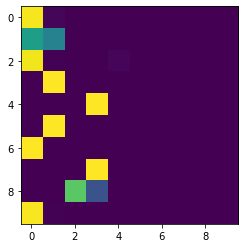

In [68]:
plt.imshow(predictions)